In [1]:
# Importing the modules and libraries
# Additional libraries should be imported in this cell for organization

import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import modelbit
mb = modelbit.login()

In [3]:
def predict_weather(days_from_now: int):
  prediction = "sunny"
  return {
    "weather": prediction,
    "message": f"In {days_from_now} days it will be {prediction}!"
  }

In [4]:
mb.deploy(predict_weather)

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [10]:
# Create a list of values from 1 to 1000
data = list(range(1, 1001))

# Create a DataFrame with the list
df = pd.DataFrame(data, columns=['Incremented_Values'])

# Display the first few rows of the DataFrame
print(df.head())

   Incremented_Values
0                   1
1                   2
2                   3
3                   4
4                   5


In [11]:
# Preparing dataset for LSTM training

df_lstm = df.values
df_lstm = df_lstm.astype('float32')

In [12]:
# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

# scaler = MinMaxScaler(feature_range=(0, 1))
# df_lstm = scaler.fit_transform(df_lstm)

In [13]:
# Split into train and test sets

train_size = int(len(df_lstm) * 0.80) # Splitting into 80% and 20%
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

800 200


In [14]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# Reshape into X=t and Y=t+1

look_back = 1 # Predicting the next value based on how many previous values
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
print(trainY)

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 

In [ ]:
# Reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
np.shape(trainX)

(798, 1, 1)

In [ ]:
# Create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


798/798 - 4s - 5ms/step - loss: 0.0399
Epoch 2/100
798/798 - 2s - 2ms/step - loss: 0.0036
Epoch 3/100
798/798 - 2s - 2ms/step - loss: 4.4913e-05
Epoch 4/100
798/798 - 2s - 2ms/step - loss: 9.2295e-06
Epoch 5/100
798/798 - 2s - 2ms/step - loss: 9.2898e-06
Epoch 6/100
798/798 - 2s - 2ms/step - loss: 9.4866e-06
Epoch 7/100
798/798 - 2s - 2ms/step - loss: 9.9199e-06
Epoch 8/100
798/798 - 2s - 2ms/step - loss: 1.0623e-05
Epoch 9/100
798/798 - 2s - 2ms/step - loss: 1.1272e-05
Epoch 10/100
798/798 - 2s - 2ms/step - loss: 1.1630e-05
Epoch 11/100
798/798 - 2s - 2ms/step - loss: 1.1828e-05
Epoch 12/100
798/798 - 2s - 2ms/step - loss: 1.1868e-05
Epoch 13/100
798/798 - 2s - 2ms/step - loss: 1.1822e-05
Epoch 14/100
798/798 - 2s - 2ms/step - loss: 1.1703e-05
Epoch 15/100
798/798 - 2s - 2ms/step - loss: 1.1541e-05
Epoch 16/100
798/798 - 2s - 2ms/step - loss: 1.1362e-05
Epoch 17/100
798/798 - 2s - 2ms/step - loss: 1.1179e-05
Epoch 18/100
798/798 - 2s - 2ms/step - loss: 1.0999e-05
Epoch 19/100
798/798 

In [ ]:
# Make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train Score: 2.06 RMSE
Test Score: 12.85 RMSE


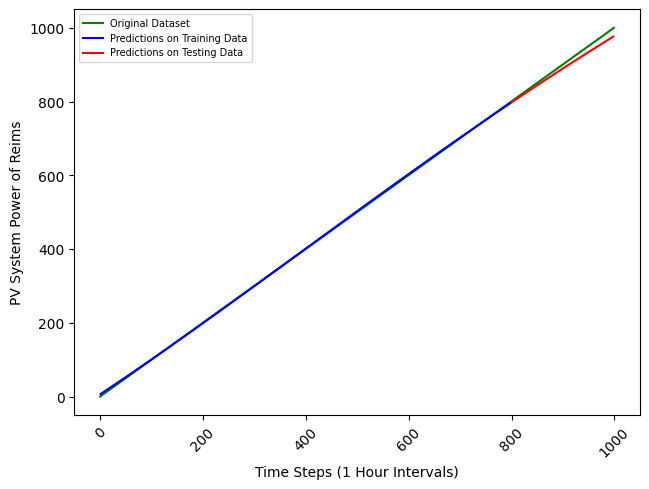

In [ ]:
# Shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# Plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)

# Adjust x-axis ticks to display fewer labels
xtick_positions = ax.get_xticks()  # Get the default tick positions

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power of Reims')
plt.show()

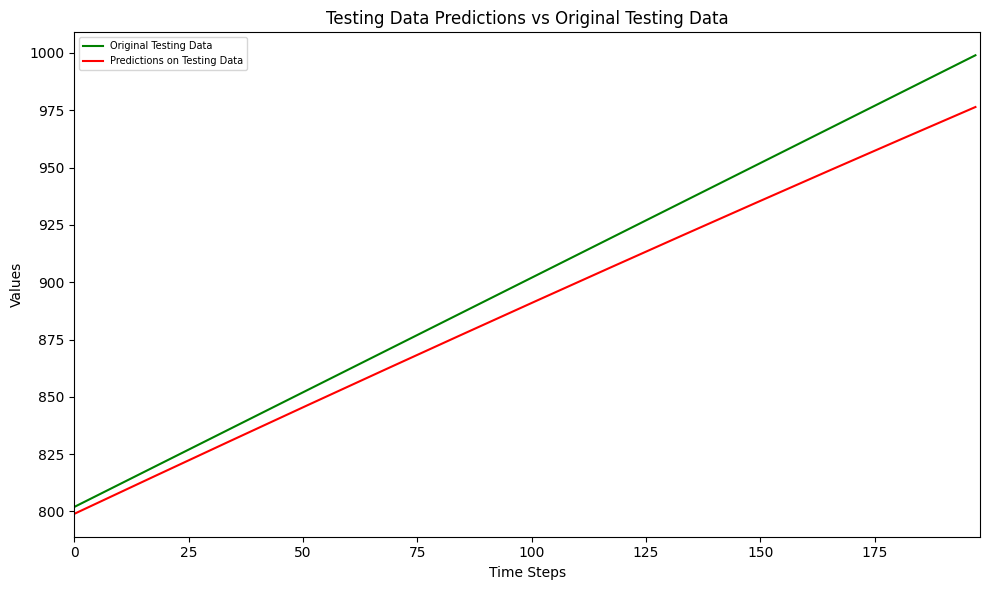

In [ ]:
# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [17]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
df_to_forecast = df.iloc[-200:]
df_to_forecast = df_to_forecast.reset_index(drop=True)
df_to_train = df.iloc[:-200]

df_lstm = df_to_train.values
df_lstm = df_lstm.astype('float32')

raw_seq = df_lstm

# split into samples
X, y = split_sequence(raw_seq, look_back)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[[1.]] [2.]
[[2.]] [3.]
[[3.]] [4.]
[[4.]] [5.]
[[5.]] [6.]
[[6.]] [7.]
[[7.]] [8.]
[[8.]] [9.]
[[9.]] [10.]
[[10.]] [11.]
[[11.]] [12.]
[[12.]] [13.]
[[13.]] [14.]
[[14.]] [15.]
[[15.]] [16.]
[[16.]] [17.]
[[17.]] [18.]
[[18.]] [19.]
[[19.]] [20.]
[[20.]] [21.]
[[21.]] [22.]
[[22.]] [23.]
[[23.]] [24.]
[[24.]] [25.]
[[25.]] [26.]
[[26.]] [27.]
[[27.]] [28.]
[[28.]] [29.]
[[29.]] [30.]
[[30.]] [31.]
[[31.]] [32.]
[[32.]] [33.]
[[33.]] [34.]
[[34.]] [35.]
[[35.]] [36.]
[[36.]] [37.]
[[37.]] [38.]
[[38.]] [39.]
[[39.]] [40.]
[[40.]] [41.]
[[41.]] [42.]
[[42.]] [43.]
[[43.]] [44.]
[[44.]] [45.]
[[45.]] [46.]
[[46.]] [47.]
[[47.]] [48.]
[[48.]] [49.]
[[49.]] [50.]
[[50.]] [51.]
[[51.]] [52.]
[[52.]] [53.]
[[53.]] [54.]
[[54.]] [55.]
[[55.]] [56.]
[[56.]] [57.]
[[57.]] [58.]
[[58.]] [59.]
[[59.]] [60.]
[[60.]] [61.]
[[61.]] [62.]
[[62.]] [63.]
[[63.]] [64.]
[[64.]] [65.]
[[65.]] [66.]
[[66.]] [67.]
[[67.]] [68.]
[[68.]] [69.]
[[69.]] [70.]
[[70.]] [71.]
[[71.]] [72.]
[[72.]] [73.]
[[73.]] [

In [18]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
lstm_batch_size = 1
X = X.reshape((X.shape[0], look_back, n_features))

In [19]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=2)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 - 2s - 85ms/step - loss: 184749.2500
Epoch 2/100
25/25 - 0s - 12ms/step - loss: 164875.1875
Epoch 3/100
25/25 - 0s - 13ms/step - loss: 133558.6719
Epoch 4/100
25/25 - 0s - 13ms/step - loss: 55550.9844
Epoch 5/100
25/25 - 0s - 13ms/step - loss: 5665.0249
Epoch 6/100
25/25 - 0s - 12ms/step - loss: 95.1902
Epoch 7/100
25/25 - 0s - 13ms/step - loss: 18.1895
Epoch 8/100
25/25 - 0s - 9ms/step - loss: 15.5377
Epoch 9/100
25/25 - 0s - 12ms/step - loss: 14.7417
Epoch 10/100
25/25 - 0s - 11ms/step - loss: 14.5202
Epoch 11/100
25/25 - 0s - 11ms/step - loss: 14.3531
Epoch 12/100
25/25 - 0s - 11ms/step - loss: 14.1880
Epoch 13/100
25/25 - 0s - 12ms/step - loss: 14.0267
Epoch 14/100
25/25 - 0s - 13ms/step - loss: 13.8686
Epoch 15/100
25/25 - 0s - 13ms/step - loss: 13.7133
Epoch 16/100
25/25 - 0s - 13ms/step - loss: 13.5605
Epoch 17/100
25/25 - 0s - 13ms/step - loss: 13.4101
Epoch 18/100
25/25 - 0s - 12ms/step - loss: 13.2619
Epoch 19/100
25/25 - 0s - 12ms/step - loss: 13.1158
Epoch

In [20]:
# Prediction demonstration
x_input = array(df_to_forecast[0:look_back])
x_input = x_input.reshape((1, 1, look_back))
yhat = model.predict(x_input, verbose=0)

print(x_input)
print(yhat)

[[[801]]]
[[802.00793]]


In [21]:
np.shape(X)

(799, 1, 1)

In [22]:
np.shape(df_lstm)

(800, 1)

In [23]:
# Getting the forecasting predictions

prediction_list = [] # Initialize empty array to store predictions

# Extracting float values from the nested structure
to_forecast_values = [item[0] for item in df_lstm[-look_back:]]

# Feeding the model the initial data
for i in range(look_back):

    prediction_list.append(to_forecast_values[i])

prediction_range = 200

for i in range(prediction_range):

    x_input = array(prediction_list[i:i+look_back])

    x_input = x_input.reshape((1, 1, look_back))

    """
    if (i == 1):
        break
    """
        
    yhat = model.predict(x_input, verbose=2)

    print("Prediction " + str(i) + " is completed.")

    prediction_list.append(yhat[0][0])

"""
print(x_input)

print(np.shape(x_input))

print(model.input_shape)

print(prediction_list)
"""


1/1 - 0s - 276ms/step
Prediction 0 is completed.
1/1 - 0s - 119ms/step
Prediction 1 is completed.
1/1 - 0s - 62ms/step
Prediction 2 is completed.
1/1 - 0s - 94ms/step
Prediction 3 is completed.
1/1 - 0s - 80ms/step
Prediction 4 is completed.
1/1 - 0s - 96ms/step
Prediction 5 is completed.
1/1 - 0s - 95ms/step
Prediction 6 is completed.
1/1 - 0s - 116ms/step
Prediction 7 is completed.
1/1 - 0s - 110ms/step
Prediction 8 is completed.
1/1 - 0s - 94ms/step
Prediction 9 is completed.
1/1 - 0s - 101ms/step
Prediction 10 is completed.
1/1 - 0s - 72ms/step
Prediction 11 is completed.
1/1 - 0s - 75ms/step
Prediction 12 is completed.
1/1 - 0s - 78ms/step
Prediction 13 is completed.
1/1 - 0s - 97ms/step
Prediction 14 is completed.
1/1 - 0s - 106ms/step
Prediction 15 is completed.
1/1 - 0s - 100ms/step
Prediction 16 is completed.
1/1 - 0s - 85ms/step
Prediction 17 is completed.
1/1 - 0s - 91ms/step
Prediction 18 is completed.
1/1 - 0s - 106ms/step
Prediction 19 is completed.
1/1 - 0s - 77ms/step
P

'\nprint(x_input)\n\nprint(np.shape(x_input))\n\nprint(model.input_shape)\n\nprint(prediction_list)\n'

In [24]:
yhat

array([[982.0043]], dtype=float32)

In [25]:
filtered_float_values = prediction_list[look_back:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(filtered_float_values, df_to_forecast[:prediction_range]))

# Print RMSE
print("RMSE:", rmse)

RMSE: 7.989749807218097


Text(0.5, 1.0, 'Forecasting the PV system power with look_back = 1')

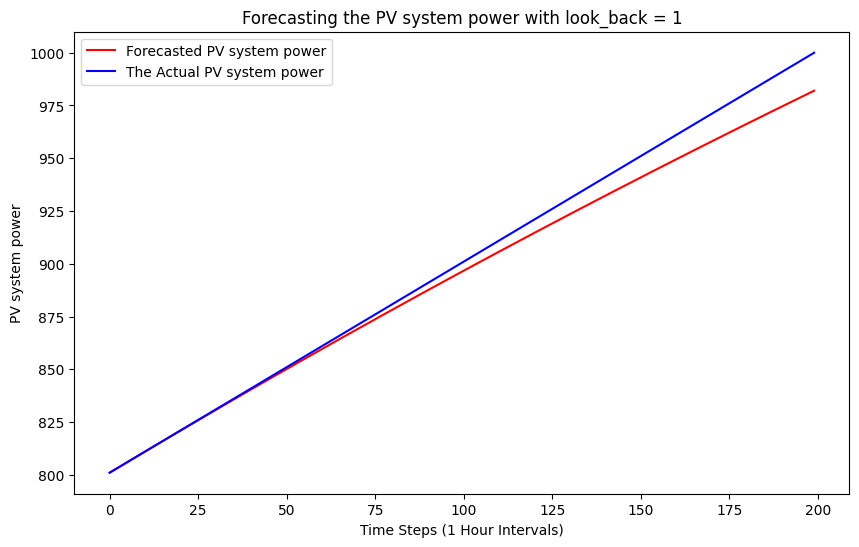

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_float_values, 'r-', label='Forecasted PV system power')
plt.plot(df_to_forecast[:prediction_range], 'b', label='The Actual PV system power')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV system power')
plt.legend()
plt.title("Forecasting the PV system power with look_back = " + str(look_back))

# More Testing

In [82]:
# Set the number of rows
num_rows = 1000

# Generate a random sequence of 0s and 1s for column 'B'
np.random.seed(0)  # For reproducibility
b_values = np.random.choice([0, 1], size=num_rows)

# Initialize the 'A' column starting at 100
a_values = [100]  # Start with 100

# Populate the 'A' column based on 'B' values
for i in range(1, num_rows):
    if b_values[i-1] == 0:
        a_values.append(a_values[i-1] - 1)  # Decrement if 'B' is 0
    else:
        a_values.append(a_values[i-1] + 1)  # Increment if 'B' is 1

# Create the DataFrame
df = pd.DataFrame({'A': a_values, 'B': b_values})

# Display the first few rows of the DataFrame
print(df.head())

     A  B
0  100  0
1   99  1
2  100  1
3  101  0
4  100  1


In [83]:
df_A = df['A']

df_A

0      100
1       99
2      100
3      101
4      100
      ... 
995    111
996    110
997    109
998    108
999    109
Name: A, Length: 1000, dtype: int64

In [10]:
# Preparing dataset for LSTM training

df_lstm = df_A.values
df_lstm = df_lstm.astype('float32')

In [11]:
df_lstm = np.reshape(df_lstm, (-1, 1))

In [12]:
# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

In [13]:
# Split into train and test sets

train_size = int(len(df_lstm) * 0.80) # Splitting into 80% and 20%
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

800 200


In [14]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# Reshape into X=t and Y=t+1

look_back = 1 # Predicting the next value based on how many previous values
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
print(trainY)

[0.09756088 0.1219511  0.14634132 0.1219511  0.14634132 0.17073178
 0.195122   0.21951222 0.24390244 0.26829267 0.2926829  0.26829267
 0.24390244 0.26829267 0.24390244 0.21951222 0.195122   0.17073178
 0.14634132 0.17073178 0.14634132 0.17073178 0.195122   0.17073178
 0.14634132 0.17073178 0.195122   0.21951222 0.24390244 0.21951222
 0.24390244 0.21951222 0.24390244 0.21951222 0.24390244 0.26829267
 0.24390244 0.26829267 0.2926829  0.26829267 0.24390244 0.26829267
 0.24390244 0.26829267 0.2926829  0.3170731  0.34146333 0.36585355
 0.34146333 0.36585355 0.34146333 0.36585355 0.39024377 0.414634
 0.43902445 0.414634   0.43902445 0.414634   0.39024377 0.414634
 0.43902445 0.414634   0.43902445 0.414634   0.43902445 0.414634
 0.39024377 0.36585355 0.34146333 0.3170731  0.34146333 0.36585355
 0.34146333 0.3170731  0.2926829  0.3170731  0.34146333 0.3170731
 0.34146333 0.3170731  0.2926829  0.3170731  0.2926829  0.3170731
 0.34146333 0.36585355 0.39024377 0.414634   0.43902445 0.414634
 0.43

In [17]:
# Reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
np.shape(trainX)

(798, 1, 1)

In [19]:
# Create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


798/798 - 4s - 5ms/step - loss: 0.1086
Epoch 2/100
798/798 - 2s - 3ms/step - loss: 0.0231
Epoch 3/100
798/798 - 2s - 3ms/step - loss: 0.0073
Epoch 4/100
798/798 - 2s - 3ms/step - loss: 0.0013
Epoch 5/100
798/798 - 2s - 3ms/step - loss: 6.8837e-04
Epoch 6/100
798/798 - 2s - 3ms/step - loss: 6.7892e-04
Epoch 7/100
798/798 - 2s - 3ms/step - loss: 6.7542e-04
Epoch 8/100
798/798 - 2s - 3ms/step - loss: 6.7181e-04
Epoch 9/100
798/798 - 2s - 3ms/step - loss: 6.6860e-04
Epoch 10/100
798/798 - 2s - 3ms/step - loss: 6.6593e-04
Epoch 11/100
798/798 - 2s - 3ms/step - loss: 6.6384e-04
Epoch 12/100
798/798 - 2s - 3ms/step - loss: 6.6225e-04
Epoch 13/100
798/798 - 2s - 3ms/step - loss: 6.6109e-04
Epoch 14/100
798/798 - 2s - 3ms/step - loss: 6.6023e-04
Epoch 15/100
798/798 - 2s - 3ms/step - loss: 6.5959e-04
Epoch 16/100
798/798 - 2s - 3ms/step - loss: 6.5910e-04
Epoch 17/100
798/798 - 2s - 3ms/step - loss: 6.5872e-04
Epoch 18/100
798/798 - 2s - 3ms/step - loss: 6.5842e-04
Epoch 19/100
798/798 - 2s - 3

In [20]:
# Make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Train Score: 1.10 RMSE
Test Score: 1.07 RMSE


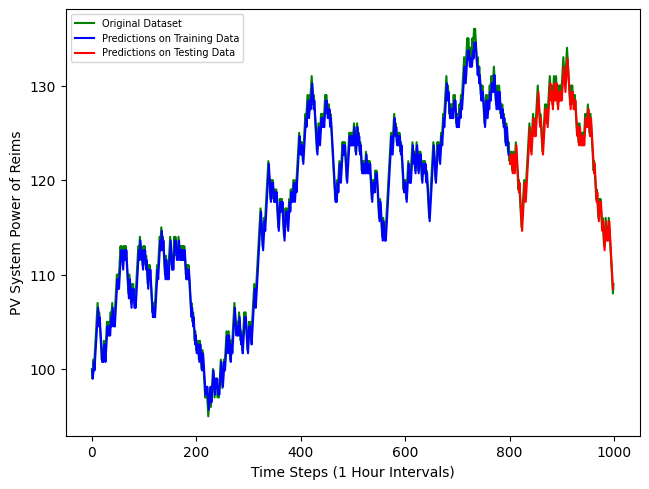

In [22]:
# Shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# Plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power of Reims')
plt.show()

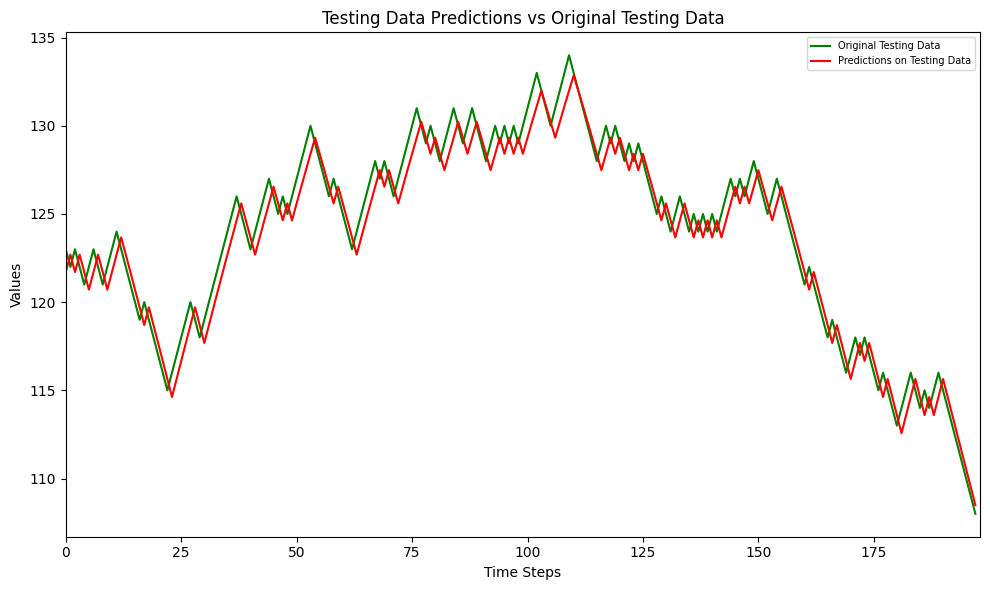

In [23]:
# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

# Multiple Features

In [92]:
# Set the number of rows
num_rows = 1000

# Generate a random sequence of 0s and 1s for column 'B'
np.random.seed(0)  # For reproducibility
b_values = np.random.choice([0, 1], size=num_rows)

# Initialize the 'A' column starting at 100
a_values = [100]  # Start with 100

# Populate the 'A' column based on 'B' values
for i in range(1, num_rows):
    if b_values[i-1] == 0:
        a_values.append(a_values[i-1] - 1)  # Decrement if 'B' is 0
    else:
        a_values.append(a_values[i-1] + 1)  # Increment if 'B' is 1

# Create the DataFrame
df = pd.DataFrame({'A': a_values, 'B': b_values})

# Display the first few rows of the DataFrame
print(df.head())

     A  B
0  100  0
1   99  1
2  100  1
3  101  0
4  100  1


In [93]:
df_copy = df
df_copy

,A,B
0,100,0
1,99,1
2,100,1
3,101,0
4,100,1
...,...,...
995,111,0
996,110,0
997,109,0
998,108,1


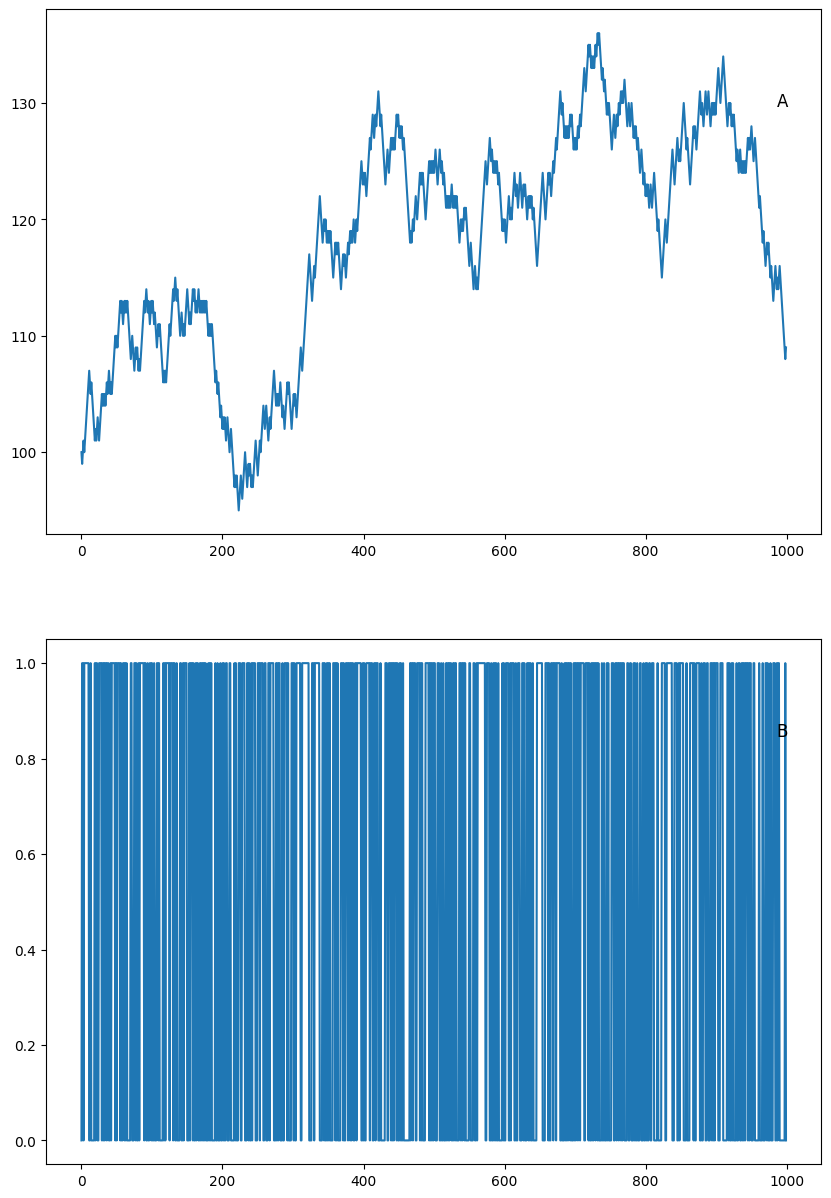

In [94]:
# Creating separate subplots for each series
values = df_copy.values

# Specify columns to plot
groups = [0, 1]
i = 1

# Plot each column
plt.figure(figsize=(10, 15))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_copy.columns[group], y=0.8, x=0.95)
	i += 1
plt.show()

In [95]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	
	# Input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	# Drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [96]:
# Load dataset
values = df_copy.values

# Integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])

# Ensure all data is float
values = values.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Specify the number of time steps and features
look_back = 3
n_features = 2

# Frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)  var2(t)
1   0.121951        0.0  0.097561      1.0
2   0.097561        1.0  0.121951      1.0
3   0.121951        1.0  0.146341      0.0
4   0.146341        0.0  0.121951      1.0
5   0.121951        1.0  0.146341      1.0


In [97]:
# Drop columns we don't want to predict
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)
1   0.121951        0.0  0.097561
2   0.097561        1.0  0.121951
3   0.121951        1.0  0.146341
4   0.146341        0.0  0.121951
5   0.121951        1.0  0.146341


In [98]:
np.shape(reframed)

(999, 3)

In [99]:
# Split into train and test sets using iloc
train_size = int(len(reframed) * 0.80)
test_size = len(reframed) - train_size

train, test = reframed.iloc[0:train_size, :], reframed.iloc[train_size:len(reframed), :]
print(len(train), len(test))

# Split into input and outputs
n_obs = look_back * n_features
train_X, train_y = train.iloc[:, :n_obs].values, train.iloc[:, -n_features].values
test_X, test_y = test.iloc[:, :n_obs].values, test.iloc[:, -n_features].values
print(train_X.shape, len(train_X), train_y.shape)

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], look_back, n_features))
test_X = test_X.reshape((test_X.shape[0], look_back, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

799 200
(799, 3) 799 (799,)


ValueError: cannot reshape array of size 2397 into shape (799,3,2)

Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 4s - 5ms/step - loss: 0.0991 - val_loss: 0.0063
Epoch 2/100
799/799 - 2s - 3ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 3/100
799/799 - 3s - 3ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 4/100
799/799 - 3s - 3ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/100
799/799 - 3s - 3ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 6/100
799/799 - 3s - 3ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 7/100
799/799 - 3s - 3ms/step - loss: 0.0038 - val_loss: 0.0094
Epoch 8/100
799/799 - 3s - 3ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 9/100
799/799 - 3s - 3ms/step - loss: 0.0046 - val_loss: 0.0068
Epoch 10/100
799/799 - 3s - 3ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 11/100
799/799 - 3s - 3ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 12/100
799/799 - 3s - 3ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 13/100
799/799 - 3s - 3ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 14/100
799/799 - 3s - 3ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 15/100
799/799 - 3s -

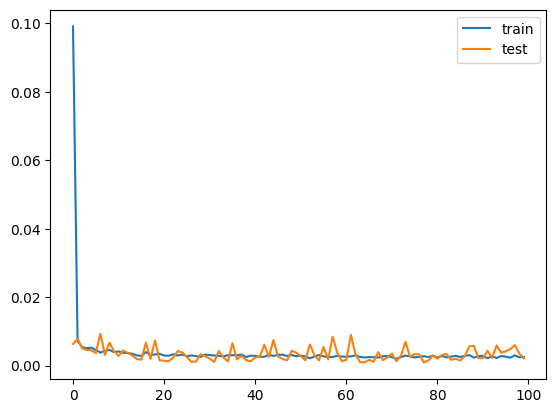

In [75]:
# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [76]:
# Make a prediction
testPredict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]*look_back))
trainPredict = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]*look_back))

# Invert scaling for forecast
inv_testPredict = np.concatenate((testPredict, test_X[:, -1:]), axis=1)
inv_testPredict = scaler.inverse_transform(inv_testPredict)
inv_testPredict = inv_testPredict[:,0]

inv_trainPredict = np.concatenate((trainPredict, train_X[:, -1:]), axis=1)
inv_trainPredict = scaler.inverse_transform(inv_trainPredict)
inv_trainPredict = inv_trainPredict[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

train_y = train_y.reshape((len(train_y), 1))
inv_y_train = np.concatenate((train_y, train_X[:, -1:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_testPredict))
print('Test RMSE: %.3f' % rmse)
rmse = np.sqrt(mean_squared_error(inv_y_train, inv_trainPredict))
print('Train RMSE: %.3f' % rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE: 0.129
Train RMSE: 0.166


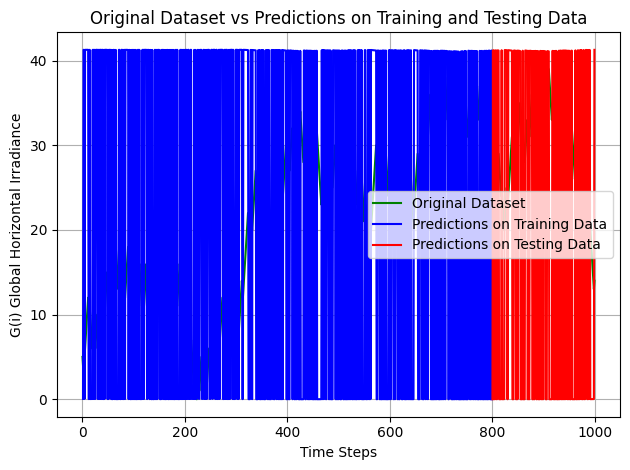

In [78]:
# Create arrays for plotting
trainPredictPlot = np.empty_like(df_copy['A'].values, dtype=float)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:look_back + len(inv_trainPredict)] = inv_trainPredict

testPredictPlot = np.empty_like(df_copy['A'].values, dtype=float)
testPredictPlot[:] = np.nan
testPredictPlot[1 + len(inv_trainPredict):] = inv_testPredict

# Plot the original dataset
plt.plot(df_copy['A'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('G(i) Global Horizontal Irradiance')
plt.title('Original Dataset vs Predictions on Training and Testing Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

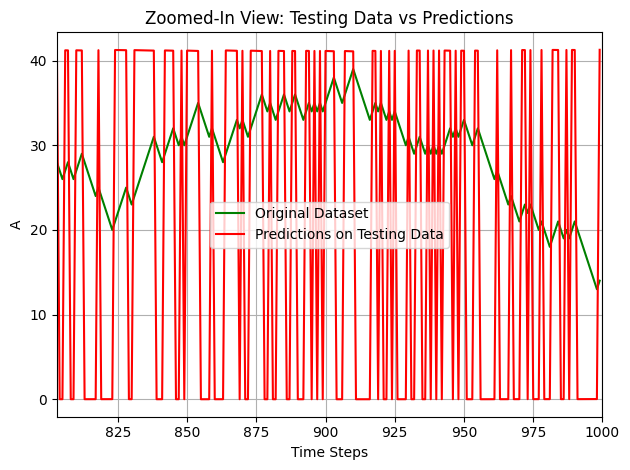

In [79]:
# Plot the original dataset
plt.plot(df_copy['A'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('A')
plt.title('Zoomed-In View: Testing Data vs Predictions')
plt.legend()

# Zoom in on the testing data
test_start_index = look_back + len(inv_trainPredict) + (look_back*2) + 1
plt.xlim(test_start_index, len(df_copy['A']))  # Focus on the first week

plt.grid()
plt.tight_layout()
plt.show()

# Another Forecasting Approach (Works)

In [18]:
# Set the number of rows
num_rows = 1000

# Generate a random sequence of 0s and 1s for column 'B'
np.random.seed(0)  # For reproducibility
b_values = np.random.choice([0, 1], size=num_rows)

# Initialize the 'A' column starting at 100
a_values = [100]  # Start with 100

# Populate the 'A' column based on 'B' values
for i in range(1, num_rows):
    if b_values[i-1] == 0:
        a_values.append(a_values[i-1] - 1)  # Decrement if 'B' is 0
    else:
        a_values.append(a_values[i-1] + 1)  # Increment if 'B' is 1

# Create the DataFrame
df = pd.DataFrame({'A': a_values, 'B': b_values})

# Display the first few rows of the DataFrame
print(df.head())

df_copy = df
print(df_copy)

     A  B
0  100  0
1   99  1
2  100  1
3  101  0
4  100  1
       A  B
0    100  0
1     99  1
2    100  1
3    101  0
4    100  1
..   ... ..
995  111  0
996  110  0
997  109  0
998  108  1
999  109  0

[1000 rows x 2 columns]


In [19]:
test_split=round(len(df_copy)*0.20)
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(800, 2)
(200, 2)


In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.12195122, 0.        ],
       [0.09756098, 1.        ],
       [0.12195122, 1.        ],
       ...,
       [0.68292683, 1.        ],
       [0.70731707, 0.        ],
       [0.68292683, 0.        ]])

In [47]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

look_back = 5

trainX,trainY=createXY(df_for_training_scaled,look_back)
testX,testY=createXY(df_for_testing_scaled,look_back)

In [48]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (795, 5, 2)
trainY Shape--  (795,)


In [49]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (195, 5, 2)
testY Shape--  (195,)


In [50]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.12195122 0.        ]
 [0.09756098 1.        ]
 [0.12195122 1.        ]
 [0.14634146 0.        ]
 [0.12195122 1.        ]]
trainY[0]--  0.14634146341463383


In [51]:
def build_model(optimizer):

    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model('adam'),verbose=1)

parameters = {'batch_size' : [1,1], 'epochs' : [1,100], 'optimizer' : ['adam','Adadelta']}

grid_search  = GridSearchCV(estimator = grid_model, param_grid = parameters, cv=2)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
grid_search = grid_search.fit(trainX,trainY)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0920
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0171
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0892
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0161
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0910
Epoch 2/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0055
Epoch 3/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0048
Epoch 4/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0052
Epoch 5/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0037
Epoch 6/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0034
Epoch 7/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0031
Epoch 8/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0042
Epoch 9/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0030
Epoch 10/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0027
Epoch 11/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0021
Epoch 12/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019
Epoch 13/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0015
Epoch 14/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0023
Epoch 15/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step -

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0160
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0016
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0013
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7478e-04
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.2557e-04
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.0382e-04
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.6169e-04
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.3670e-04
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.7000e-04
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.8399e-04
Epoch 13/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.3080e-04
Epoch 14/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.0946e-04
Epoch 15/100
398/39

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0886
Epoch 2/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0056
Epoch 3/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0052
Epoch 4/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0051
Epoch 5/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0039
Epoch 6/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0041
Epoch 7/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0027
Epoch 8/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0026
Epoch 9/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0030
Epoch 10/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0033
Epoch 11/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0023
Epoch 12/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0022
Epoch 13/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0022
Epoch 14/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 15/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step -

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0167
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0020
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0012
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.0778e-04
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.5190e-04
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0013
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.2423e-04
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.9930e-04
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.2767e-04
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.4779e-04
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.7174e-04
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.8354e-04
Epoch 13/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.7806e-04
Epoch 14/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.7339e-04
Epoch 15/100
39

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0899
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0174
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0880
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0165
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0918
Epoch 2/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0063
Epoch 3/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0048
Epoch 4/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0042
Epoch 5/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0043
Epoch 6/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0047
Epoch 7/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0027
Epoch 8/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0030
Epoch 9/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0025
Epoch 10/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0022
Epoch 11/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0022
Epoch 12/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0020
Epoch 13/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0021
Epoch 14/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019
Epoch 15/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step -

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0171
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0019
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0014
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0010
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.9361e-04
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.5409e-04
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.8059e-04
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.6570e-04
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.7972e-04
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.0478e-04
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.1236e-04
Epoch 13/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.7756e-04
Epoch 14/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.7937e-04
Epoch 15/100
398/39

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0866
Epoch 2/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0066
Epoch 3/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0047
Epoch 4/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0049
Epoch 5/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0046
Epoch 6/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0040
Epoch 7/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0034
Epoch 8/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0027
Epoch 9/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0033
Epoch 10/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0023
Epoch 11/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0025
Epoch 12/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019
Epoch 13/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0024
Epoch 14/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0016
Epoch 15/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step -

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0158
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0022
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0016
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0012
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.7658e-04
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.6078e-04
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.1609e-04
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.1747e-04
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.0766e-04
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.8140e-04
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.4417e-04
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.8368e-04
Epoch 13/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.5338e-04
Epoch 14/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.7911e-04
Epoch 15/100
39

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0318
Epoch 2/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0031
Epoch 3/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0036
Epoch 4/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0018
Epoch 5/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0019
Epoch 6/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0016
Epoch 7/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0015
Epoch 8/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0012
Epoch 9/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0010
Epoch 10/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011
Epoch 11/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 9.5688e-04
Epoch 12/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.5948e-04
Epoch 13/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.8890e-04
Epoch 14/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 8.6728e-04
Epoch 15/100
795/795 ━━━━━━

In [58]:
grid_search.best_params_

{'batch_size': 1, 'epochs': 100, 'optimizer': 'Adadelta'}

{'batch_size': 1, 'epochs': 100, 'optimizer': 'Adadelta'}

In [61]:
my_model = grid_search.best_estimator_

In [62]:
print(my_model)

KerasRegressor(
	model=None
	build_fn=<Sequential name=sequential_4, built=True>
	warm_start=False
	random_state=None
	optimizer=Adadelta
	loss=None
	metrics=None
	batch_size=1
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)


In [63]:
prediction=my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
prediction
 [0.6294628  0.6542332  0.6787025  0.6533679  0.6287594  0.6541471
 0.6787025  0.7020423  0.67678505 0.6530473  0.62972206 0.6063068
 0.5825127  0.60654396 0.58182335 0.55694425 0.5329587  0.5095222
 0.48606277 0.50975513 0.5333686  0.556345   0.5797979  0.60445726
 0.57979923 0.5558664  0.5811123  0.6057557  0.62906045 0.65257347
 0.67719305 0.701471   0.7257439  0.7499985  0.72549295 0.7018001
 0.67845815 0.7036809  0.72759795 0.7506884  0.7741033  0.74979675
 0.72617716 0.75166994 0.7273636  0.7515667  0.7752961  0.79904664
 0.8224957  0.84655833 0.82248837 0.7991596  0.77592385 0.7524105
 0.7770088  0.75208235 0.72726595 0.7031022  0.6793227  0.7039623
 0.72759795 0.7506884  0.7741033  0.7983982  0.77407306 0.7992848
 0.7751863  0.7513058  0.7761278  0.8001772  0.8233876  0.84659016
 0.8705133  0.8465998  0.82339346 0.8486153  0.82447386 0.8002917
 0.82465607 0.8484344  0.8715172  0.84680116 0.82339346 0.8486153
 0.87243867 0.8477

In [ ]:
# scaler.inverse_transform(prediction)

In [65]:
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [67]:
prediction_copies_array.shape

(390,)

In [68]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [69]:
original_copies_array = np.repeat(testY,2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [70]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [120.807976 121.82356  122.826805 121.788086 120.77913  121.82003
 122.826805 123.78374  122.74819  121.77494  120.8186   119.858574
 118.883026 119.8683   118.85475  117.83472  116.8513   115.89041
 114.92857  115.899956 116.86811  117.81014  118.77171  119.78275
 118.771774 117.79052  118.82561  119.83598  120.79148  121.755516
 122.764915 123.760315 124.7555   125.74994  124.74521  123.7738
 122.81679  123.85092  124.83151  125.77823  126.738235 125.74167
 124.77326  125.818474 124.82191  125.81424  126.78714  127.76092
 128.72232  129.7089   128.72203  127.76555  126.81288  125.84883
 126.85736  125.83537  124.81791  123.827194 122.85223  123.86245
 124.83151  125.77823  126.738235 127.73433  126.73699  127.77068
 126.78264  125.803535 126.821236 127.80727  128.7589   129.7102
 130.69106  129.71059  128.75914  129.79323  128.80342  127.81196
 128.8109   129.78581  130.73221  129.71886  128.75914  129.79323
 130.76999  129.75835  128.76851  127.80893  128.83339  129.7

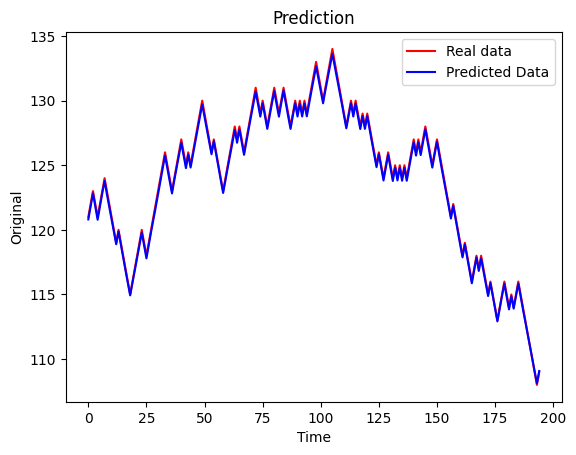

In [71]:
plt.plot(original, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted Data')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Original')
plt.legend()
plt.show()

# ARIMA Method Implementation

In [20]:
# Initialize starting value
start_value = 100
values = []

# Loop to create the values based on the specified pattern
while len(values) < 1000:
    # Increment by 1 for 30 rows
    increment_values = [start_value + i for i in range(30)]
    values.extend(increment_values)
    
    # Set new start value for the decrement pattern
    start_value = increment_values[-1] + 1
    
    # Decrement by 1 for 20 rows
    decrement_values = [start_value - i for i in range(20)]
    values.extend(decrement_values)
    
    # Set new start value for the next increment pattern
    start_value = decrement_values[-1] - 1

# Trim the list to 1000 elements if necessary
values = values[:1000]

# Create the initial DataFrame
df = pd.DataFrame(values, columns=['A'])

"""
# Add column 'B' with values from 1 to 1000
df['B'] = range(1, 1001)

# Swap the columns so 'B' comes first
df = df[['B', 'A']]
"""

# Display the first few rows of the DataFrame
print(df.head(40))  # To visualize the first 40 rows to verify the columns

      A
0   100
1   101
2   102
3   103
4   104
5   105
6   106
7   107
8   108
9   109
10  110
11  111
12  112
13  113
14  114
15  115
16  116
17  117
18  118
19  119
20  120
21  121
22  122
23  123
24  124
25  125
26  126
27  127
28  128
29  129
30  130
31  129
32  128
33  127
34  126
35  125
36  124
37  123
38  122
39  121


     A
0  100
1  101
2  102
3  103
4  104


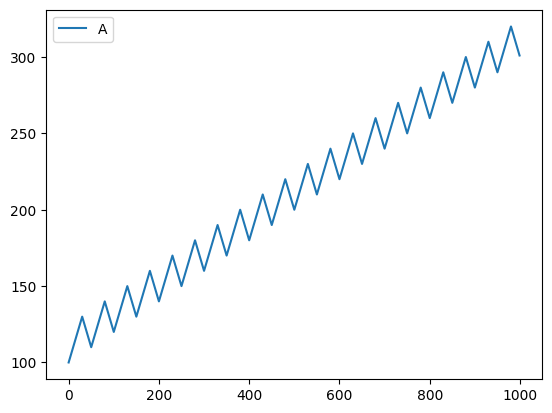

In [21]:
print(df.head())

df.plot()
plt.show()

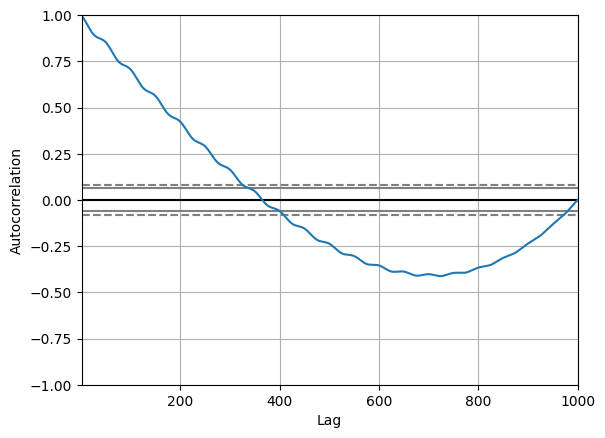

In [22]:
autocorrelation_plot(df)
plt.show()

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                 1000
Model:                ARIMA(50, 1, 0)   Log Likelihood                1041.463
Date:                Thu, 16 Jan 2025   AIC                          -1980.926
Time:                        15:23:45   BIC                          -1730.681
Sample:                             0   HQIC                         -1885.811
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3064      0.104     -2.937      0.003      -0.511      -0.102
ar.L2         -0.0670      0.135     -0.497      0.619      -0.331       0.197
ar.L3         -0.0473      0.120     -0.395      0.6

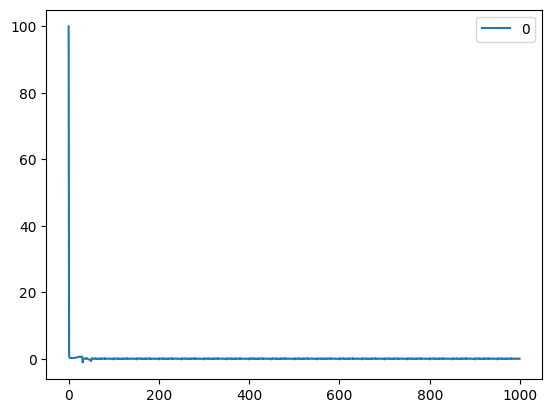

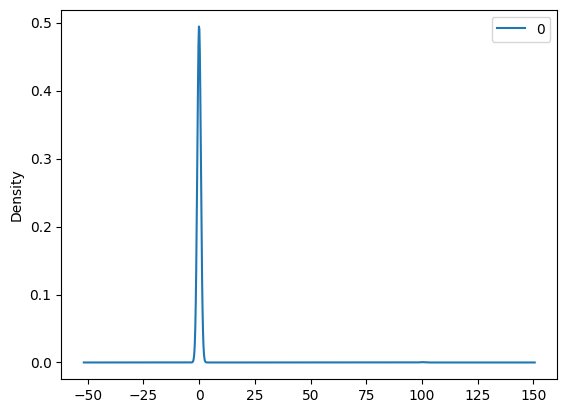

                 0
count  1000.000000
mean      0.113413
std       3.163946
min      -1.129106
25%      -0.031698
50%       0.007441
75%       0.057160
max     100.000000


In [23]:
# fit model
model = ARIMA(df, order=(50,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_28028\2540894127.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=239.997015, expected=240.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=240.897706, expected=241.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=242.084041, expected=242.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=242.991017, expected=243.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=243.963159, expected=244.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=244.962682, expected=245.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=246.099168, expected=246.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.094704, expected=247.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=248.007753, expected=248.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=248.951577, expected=249.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.110924, expected=250.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.885861, expected=251.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=251.902105, expected=252.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.024819, expected=253.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=254.063378, expected=254.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=255.020429, expected=255.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=255.981936, expected=256.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.945126, expected=257.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=257.949095, expected=258.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.990134, expected=259.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.834297, expected=260.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.102528, expected=259.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.175798, expected=258.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=257.000595, expected=257.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.009264, expected=256.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=254.996980, expected=255.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.941705, expected=254.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=252.978245, expected=253.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=251.958564, expected=252.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.937049, expected=251.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=249.919389, expected=250.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=249.076169, expected=249.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=248.052604, expected=248.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=246.971201, expected=247.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=245.988625, expected=246.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=245.015024, expected=245.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=243.948867, expected=244.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=242.999183, expected=243.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=242.025300, expected=242.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=240.983586, expected=241.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=240.192993, expected=240.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=240.916598, expected=241.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=241.833027, expected=242.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=242.947857, expected=243.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=243.991848, expected=244.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=245.066836, expected=245.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=246.045539, expected=246.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.057511, expected=247.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.927834, expected=248.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=248.982346, expected=249.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=249.957806, expected=250.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.974870, expected=251.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=252.055208, expected=252.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=252.994494, expected=253.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.937970, expected=254.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=254.946467, expected=255.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.057158, expected=256.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=257.143373, expected=257.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.010293, expected=258.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.954233, expected=259.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.045914, expected=260.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.920715, expected=261.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=261.853898, expected=262.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.065495, expected=263.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.991625, expected=264.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=264.982922, expected=265.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.954233, expected=266.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.043209, expected=267.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.975907, expected=268.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.030644, expected=269.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.765001, expected=270.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.073321, expected=269.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=268.164315, expected=268.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.039128, expected=267.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.057203, expected=266.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.036485, expected=265.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.947236, expected=264.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.991646, expected=263.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=261.994691, expected=262.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.956118, expected=261.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.939955, expected=260.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.073024, expected=259.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.030905, expected=258.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.983859, expected=257.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=255.950026, expected=256.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=255.016197, expected=255.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.940371, expected=254.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=252.985734, expected=253.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=252.076565, expected=252.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.952376, expected=251.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.246588, expected=250.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=250.959729, expected=251.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=251.826348, expected=252.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.004053, expected=253.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=253.952737, expected=254.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=254.983875, expected=255.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=255.987633, expected=256.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.954540, expected=257.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=257.982112, expected=258.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.068473, expected=259.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=259.903066, expected=260.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.944218, expected=261.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.075229, expected=262.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.997731, expected=263.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=264.046079, expected=264.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=264.945410, expected=265.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.085995, expected=266.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.129997, expected=267.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=268.006134, expected=268.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=268.935212, expected=269.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.087953, expected=270.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.903908, expected=271.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=271.950713, expected=272.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=273.067889, expected=273.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=274.023087, expected=274.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=275.015669, expected=275.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=275.973065, expected=276.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.000164, expected=277.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=278.008483, expected=278.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.011615, expected=279.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.911553, expected=280.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.091674, expected=279.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=278.140997, expected=278.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.031897, expected=277.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.014335, expected=276.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=274.969063, expected=275.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=274.013321, expected=274.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.966599, expected=273.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.042189, expected=272.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=271.002097, expected=271.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.959943, expected=270.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.113432, expected=269.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=268.000714, expected=268.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.954309, expected=267.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.960035, expected=266.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.017263, expected=265.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.978880, expected=264.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.027693, expected=263.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.040377, expected=262.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=261.023335, expected=261.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.179972, expected=260.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.874613, expected=261.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=261.847752, expected=262.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.991824, expected=263.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=263.994842, expected=264.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.044823, expected=265.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.974247, expected=266.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.917453, expected=267.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.964980, expected=268.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.105031, expected=269.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=269.963843, expected=270.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.912809, expected=271.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.069248, expected=272.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.991544, expected=273.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=273.947445, expected=274.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=274.963285, expected=275.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.057226, expected=276.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.152556, expected=277.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.999008, expected=278.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=278.978140, expected=279.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.096769, expected=280.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.929034, expected=281.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=281.920273, expected=282.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.998980, expected=283.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=284.061816, expected=284.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=284.976074, expected=285.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.982285, expected=286.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=286.997748, expected=287.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.002554, expected=288.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.030801, expected=289.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.828948, expected=290.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.097395, expected=289.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.109531, expected=288.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=287.042671, expected=287.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=286.012050, expected=286.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.050036, expected=285.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=283.929355, expected=284.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.948655, expected=283.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.002837, expected=282.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=281.004129, expected=281.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.980943, expected=280.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.143502, expected=279.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.984184, expected=278.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.922739, expected=277.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.007811, expected=276.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=274.966271, expected=275.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=273.994890, expected=274.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.993742, expected=273.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.012502, expected=272.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.989710, expected=271.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.146550, expected=270.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=270.887438, expected=271.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=271.832930, expected=272.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=272.934183, expected=273.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=273.962013, expected=274.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=275.027284, expected=275.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.091775, expected=276.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.941202, expected=277.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.936827, expected=278.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.038083, expected=279.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.946302, expected=280.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.986350, expected=281.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.107731, expected=282.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=283.021715, expected=283.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=284.026412, expected=284.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=284.945786, expected=285.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=286.074833, expected=286.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=287.108548, expected=287.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.015389, expected=288.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.937594, expected=289.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.073869, expected=290.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.964331, expected=291.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=291.975715, expected=292.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=293.043084, expected=293.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=294.037800, expected=294.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=294.917629, expected=295.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=295.974132, expected=296.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.999597, expected=297.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.999530, expected=298.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.037496, expected=299.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.725152, expected=300.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.117260, expected=299.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=298.126168, expected=298.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.040793, expected=297.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.005682, expected=296.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=294.959586, expected=295.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=293.935578, expected=294.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.966879, expected=293.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.061836, expected=292.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=291.003971, expected=291.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.931363, expected=290.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.053406, expected=289.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=287.977957, expected=288.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=286.965456, expected=287.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.995874, expected=286.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.017556, expected=285.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=283.988145, expected=284.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.983351, expected=283.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.022506, expected=282.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.990994, expected=281.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.194605, expected=280.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.860127, expected=281.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=281.913368, expected=282.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=282.949831, expected=283.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=283.996323, expected=284.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.052887, expected=285.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=285.956028, expected=286.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=286.979866, expected=287.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=287.950511, expected=288.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.997669, expected=289.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=289.943477, expected=290.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.958672, expected=291.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.111812, expected=292.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=293.027631, expected=293.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=293.891659, expected=294.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=295.012531, expected=295.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.062058, expected=296.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.106844, expected=297.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.988018, expected=298.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=298.916906, expected=299.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=300.052869, expected=300.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=300.959492, expected=301.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=301.912439, expected=302.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.042886, expected=303.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.031967, expected=304.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.873419, expected=305.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=305.961412, expected=306.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.062630, expected=307.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.980352, expected=308.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=308.983860, expected=309.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=309.787932, expected=310.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=309.119599, expected=309.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=308.108797, expected=308.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.031362, expected=307.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.045913, expected=306.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.991055, expected=305.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.958903, expected=304.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=302.971099, expected=303.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=302.011840, expected=302.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=300.987418, expected=301.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.957526, expected=300.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.046521, expected=299.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=298.052838, expected=298.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.999117, expected=297.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.015648, expected=296.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=295.042532, expected=295.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=294.025017, expected=294.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.973590, expected=293.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.038210, expected=292.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.994199, expected=291.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.162260, expected=290.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=290.917286, expected=291.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=291.878608, expected=292.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=292.975922, expected=293.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=293.959058, expected=294.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=295.016176, expected=295.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.015216, expected=296.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=296.947444, expected=297.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.899907, expected=298.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.073551, expected=299.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=299.906268, expected=300.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=300.953527, expected=301.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=302.137270, expected=302.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.019868, expected=303.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.914423, expected=304.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.971258, expected=305.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.080850, expected=306.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.002458, expected=307.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.980382, expected=308.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=308.913691, expected=309.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=310.096072, expected=310.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=310.965743, expected=311.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=311.952232, expected=312.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=313.026783, expected=313.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=314.044902, expected=314.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=314.922217, expected=315.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=315.966367, expected=316.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=317.004640, expected=317.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=317.981795, expected=318.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=319.010537, expected=319.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=319.727957, expected=320.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=319.049088, expected=319.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=318.151344, expected=318.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=316.993088, expected=317.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=316.011461, expected=316.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=314.967480, expected=315.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=313.925793, expected=314.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=312.969227, expected=313.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=311.956375, expected=312.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=311.022161, expected=311.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=309.977871, expected=310.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=309.104145, expected=309.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=307.984493, expected=308.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.959954, expected=307.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.001966, expected=306.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=305.012704, expected=305.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.982702, expected=304.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.019067, expected=303.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=302.079972, expected=302.000000


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=301.011098, expected=301.000000
Test RMSE: 0.072


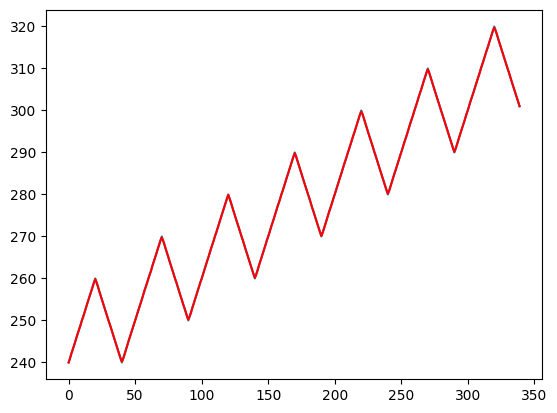

In [24]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(50,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
	
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

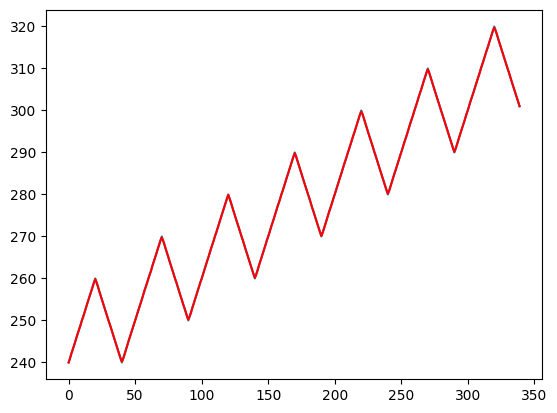

In [25]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [29]:
flattable_history = history

In [31]:
print(flattable_history)

[array([100]), array([101]), array([102]), array([103]), array([104]), array([105]), array([106]), array([107]), array([108]), array([109]), array([110]), array([111]), array([112]), array([113]), array([114]), array([115]), array([116]), array([117]), array([118]), array([119]), array([120]), array([121]), array([122]), array([123]), array([124]), array([125]), array([126]), array([127]), array([128]), array([129]), array([130]), array([129]), array([128]), array([127]), array([126]), array([125]), array([124]), array([123]), array([122]), array([121]), array([120]), array([119]), array([118]), array([117]), array([116]), array([115]), array([114]), array([113]), array([112]), array([111]), array([110]), array([111]), array([112]), array([113]), array([114]), array([115]), array([116]), array([117]), array([118]), array([119]), array([120]), array([121]), array([122]), array([123]), array([124]), array([125]), array([126]), array([127]), array([128]), array([129]), array([130]), array

In [32]:
# Ensure all elements in history are scalars
flattable_history = [x[0] if isinstance(x, np.ndarray) else x for x in flattable_history]

In [33]:
# Forecast future timesteps
future_predictions = []
num_future_steps = 50  # Predict the next 50 timesteps

future_history = flattable_history

for _ in range(num_future_steps):
    future_model = ARIMA(future_history, order=(50, 1, 0))
    future_model_fit = future_model.fit()
    future_output = future_model_fit.forecast()
    future_yhat = future_output[0]
    future_predictions.append(future_yhat)
    future_history.append(future_yhat)  # Use predicted value as next input

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Use

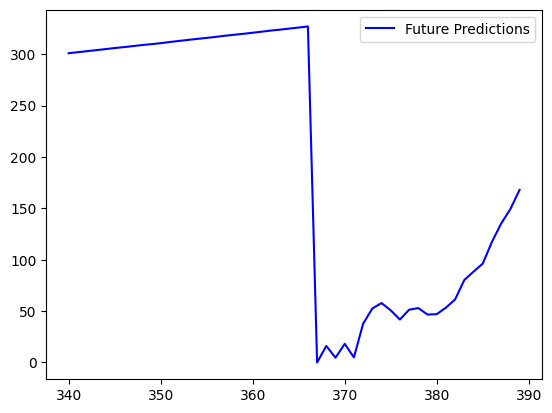

Future Predictions:
[np.float64(300.9709529607168), np.float64(301.93427499072857), np.float64(302.93706045141784), np.float64(303.9402978950671), np.float64(304.9424893023743), np.float64(305.97695944030653), np.float64(306.8748447373366), np.float64(307.86165827768514), np.float64(308.911311379297), np.float64(309.7804595529671), np.float64(310.71629042275686), np.float64(311.87399833035875), np.float64(312.90795802424043), np.float64(313.925953749997), np.float64(314.9123273163267), np.float64(315.85520494716303), np.float64(316.8701858481017), np.float64(317.9685364228956), np.float64(318.8944084734832), np.float64(319.8562664825515), np.float64(320.8615221547471), np.float64(321.92696795300185), np.float64(323.01421055084427), np.float64(323.927936969923), np.float64(324.9413370545693), np.float64(325.9541268164), np.float64(326.97122455376143), np.float64(0.0), np.float64(16.104437042186955), np.float64(4.629467990499874), np.float64(18.13830457436017), np.float64(4.9100539011224

In [34]:
# Plot future predictions
plt.plot(range(len(test), len(test) + num_future_steps), future_predictions, color='blue', label='Future Predictions')
plt.legend()
plt.show()

print("Future Predictions:")
print(future_predictions)